# Experimento: MNIST

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('../')

from src.network import NeuralNetwork
from src.optimizers import Adam, SGD
from src.trainer import Trainer
from src.utils import (
    split_data, one_hot, fit_minmax, transform_minmax, accuracy,
    plot_curves, confusion_matrix, plot_confusion_matrix, show_predictions
)

from data.mnist_loader import download_and_load_mnist

In [2]:
X, y = download_and_load_mnist(data_subdir="mnist", cache_npz=True)
num_classes = 10

(X_train, y_train), (X_val, y_val), (X_test, y_test) = split_data(
    X, y, train_ratio=0.6, val_ratio=0.2, test_ratio=0.2, random_seed=42, shuffle=True
)

y_train_oh = one_hot(y_train, num_classes)
y_val_oh   = one_hot(y_val,   num_classes)
y_test_oh  = one_hot(y_test,  num_classes)

print('Train:', X_train.shape, 'Val:', X_val.shape, 'Test:', X_test.shape)

Train: (42000, 784) Val: (14000, 784) Test: (14000, 784)


Epoch 001 | loss 0.3340 | acc 0.9059 | val_loss 0.17969304118218402 | val_acc 0.9491428571428572
Epoch 002 | loss 0.1349 | acc 0.9596 | val_loss 0.1390636579916788 | val_acc 0.9596428571428571
Epoch 003 | loss 0.0916 | acc 0.9720 | val_loss 0.11352034046666144 | val_acc 0.965
Epoch 004 | loss 0.0660 | acc 0.9801 | val_loss 0.09340307354505768 | val_acc 0.9717857142857143
Epoch 005 | loss 0.0494 | acc 0.9848 | val_loss 0.09805646499268049 | val_acc 0.9722142857142857
Epoch 006 | loss 0.0376 | acc 0.9885 | val_loss 0.0900681992590402 | val_acc 0.9744285714285714
Epoch 007 | loss 0.0302 | acc 0.9912 | val_loss 0.08460048178670944 | val_acc 0.9757142857142858
Epoch 008 | loss 0.0266 | acc 0.9926 | val_loss 0.08293260694670378 | val_acc 0.9768571428571429
Epoch 009 | loss 0.0202 | acc 0.9941 | val_loss 0.0905280044078835 | val_acc 0.9753571428571428
Epoch 010 | loss 0.0197 | acc 0.9942 | val_loss 0.11733686775158578 | val_acc 0.9676428571428571
Epoch 011 | loss 0.0186 | acc 0.9943 | val_los

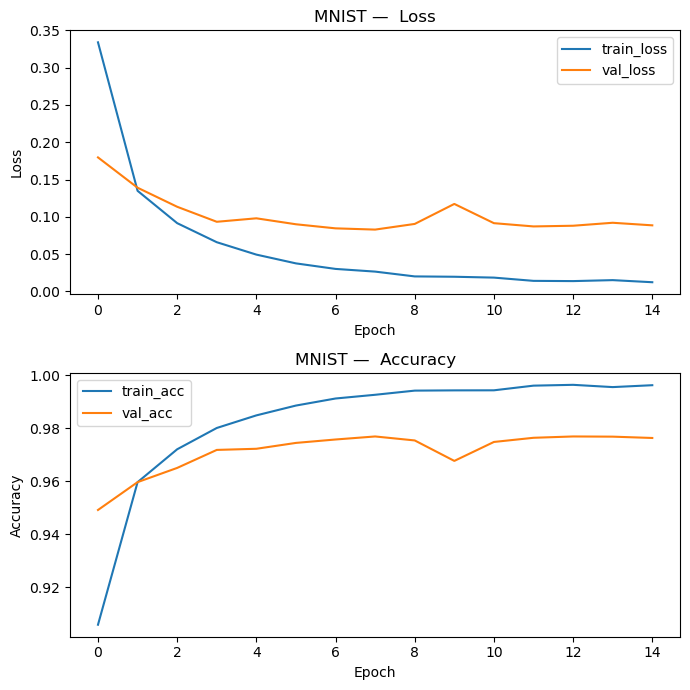

In [3]:

architecture = [784, 256, 128, 10]
activations = ['relu', 'relu', 'softmax']
dropout_rates = [0.2, 0.2, 0.0]

optimizer = Adam(lr=1e-3, weight_decay=1e-4)

net = NeuralNetwork(architecture, activations, dropout_rates=None)
trainer = Trainer(net, optimizer, loss='cross_entropy')

history = trainer.train(
    X_train, y_train_oh,
    X_val=X_val, y_val=y_val_oh,
    epochs=15,
    batch_size=128,
    classification=True,
    verbose=True,
    early_stopping=False,
    patience=5,
    min_delta=1e-4
)

plot_curves(history, title_prefix='MNIST — ')

Accuracy en test: 0.9793571428571428


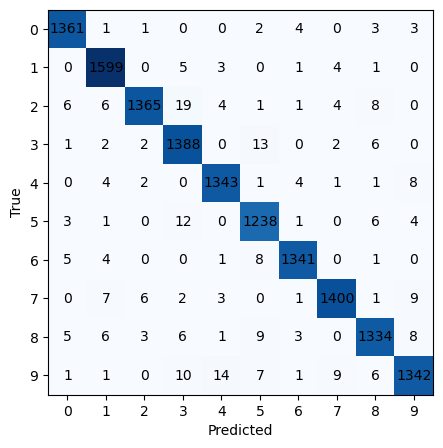

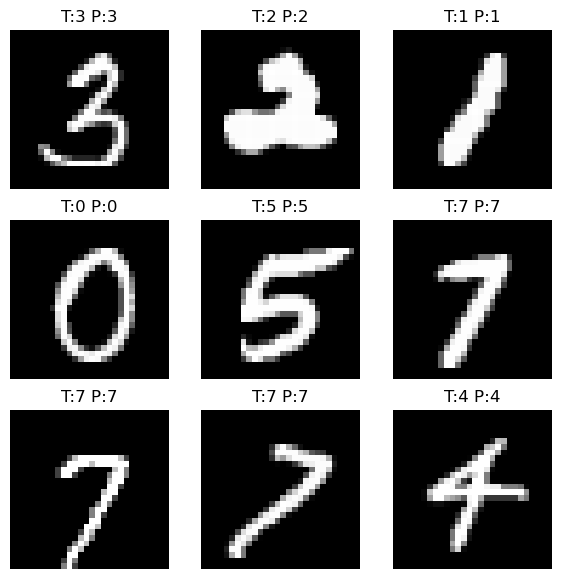

In [4]:
probs_test = net.forward(X_test)
test_acc = accuracy(y_test_oh, probs_test)
y_pred = np.argmax(probs_test, axis=1)
cm = confusion_matrix(y_test_oh, probs_test, num_classes)
print('Accuracy en test:', float(test_acc))
plot_confusion_matrix(cm, [str(i) for i in range(10)])
show_predictions(X_test[:9], np.argmax(y_test_oh[:9],1), np.argmax(probs_test[:9],1), [str(i) for i in range(10)])